# Schedule distribution analysis
---

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

## Upload CSV files

In [42]:
ruta = "../../data/INF-285"

students = [f for f in os.listdir(ruta + "/students") if f.endswith(".csv")]
assistants = [f for f in os.listdir(ruta + "/assistants") if f.endswith(".csv")]
schedules_as = {}
schedules_st = {}

for file in students:
    df = pd.read_csv(os.path.join(ruta + "/students", file), header=None)
    schedules_st[file] = df

for file in assistants:
    df = pd.read_csv(os.path.join(ruta + "/assistants", file), header=None)
    schedules_as[file] = df

print(f"{len(schedules_st) + len(schedules_as)} files were uploaded successfully ✅")

33 files were uploaded successfully ✅


## General Analysis
Counting of empty blocks, classes, and activities per file.

In [43]:
resumen_st = []
resumen_as = []

for name, df in schedules_st.items():
    count = df.stack().value_counts().to_dict()
    resumen_st.append(
        {
            "File": name,
            "Slots empty (0)": count.get(0, 0),
            "Classes (1)": count.get(1, 0),
            "Subject classes (2)": count.get(2, 0),
            "Total": df.size,
        }
    )

for name, df in schedules_as.items():
    count = df.stack().value_counts().to_dict()
    resumen_as.append(
        {
            "File": name,
            "Slots empty (0)": count.get(0, 0),
            "Classes (1)": count.get(1, 0),
            "Subject classes (2)": count.get(2, 0),
            "Total": df.size,
        }
    )

resumen_df_st = pd.DataFrame(resumen_st)
display(resumen_df_st)

resumen_df_as = pd.DataFrame(resumen_as)
display(resumen_df_as)

,File,Slots empty (0),Classes (1),Subject classes (2),Total
0,6.csv,35,12,3,50
1,7.csv,40,7,3,50
2,5.csv,37,10,3,50
3,4.csv,26,21,3,50
4,1.csv,34,12,4,50
5,3.csv,36,11,3,50
6,2.csv,31,16,3,50
7,23.csv,35,12,3,50
8,22.csv,28,19,3,50
9,20.csv,41,6,3,50


,File,Slots empty (0),Classes (1),Subject classes (2),Total
0,1.csv,38,12,0,50
1,2.csv,40,10,0,50


## Schedule Display
Each file is displayed as a **heatmap** where:
- 0 → Light gray (empty)
- 1 → Blue (activity)
- 2 → Green (activity related to the subject)

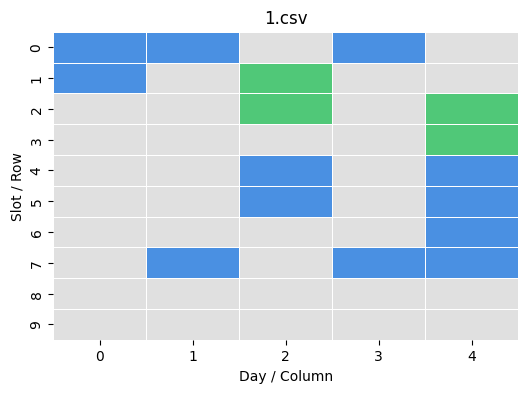

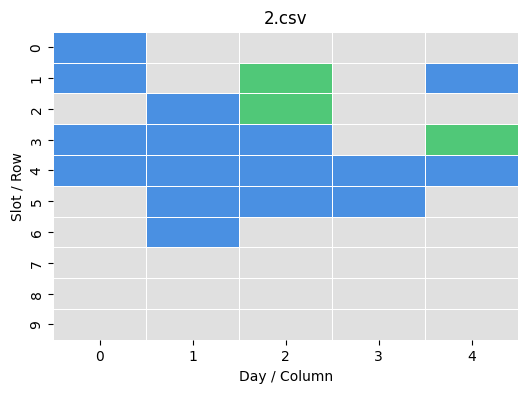

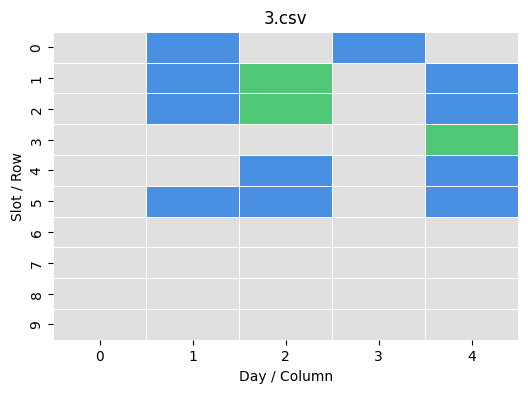

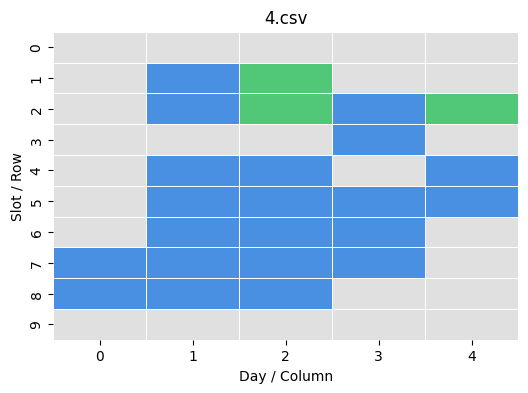

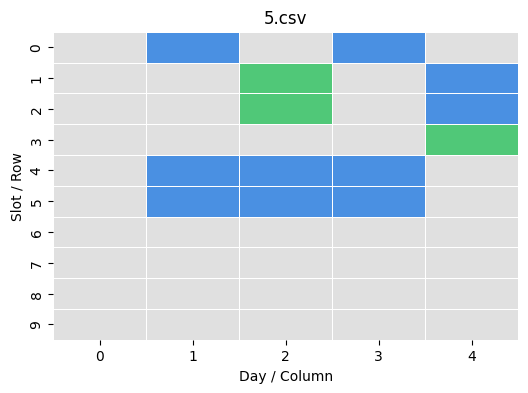

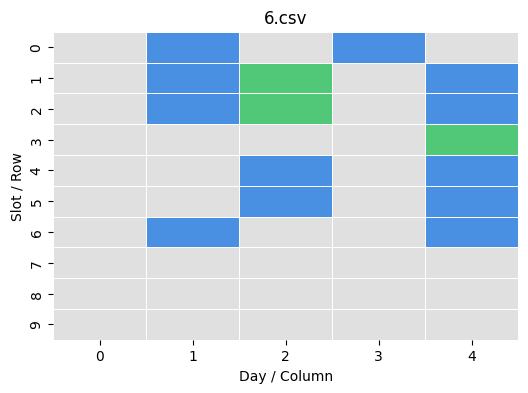

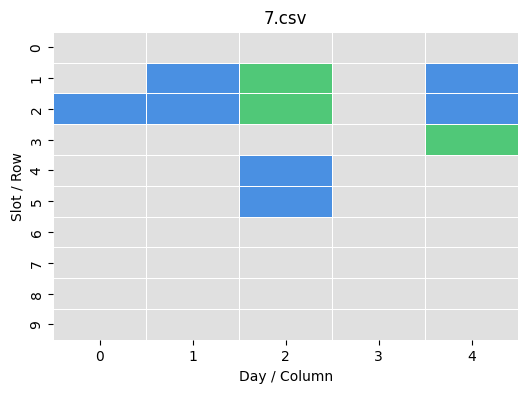

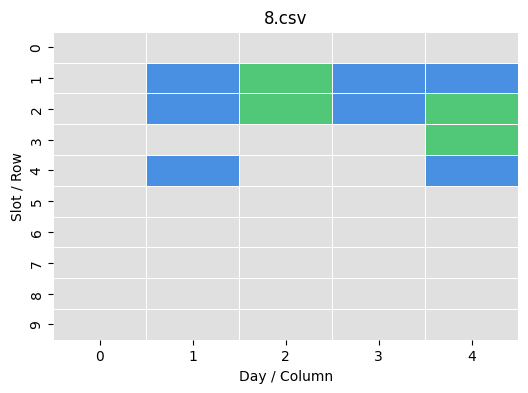

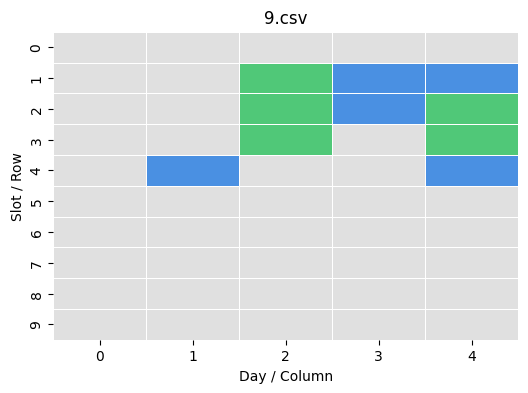

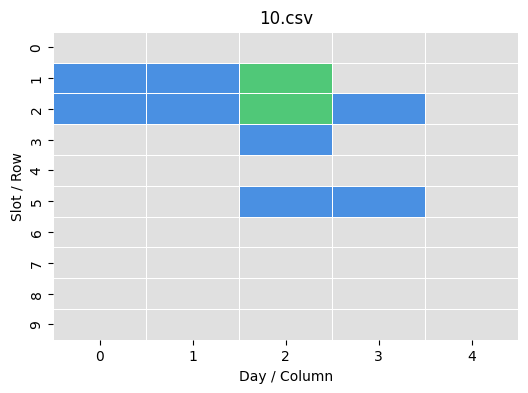

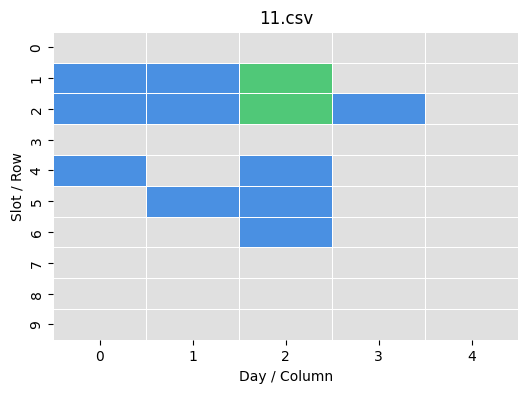

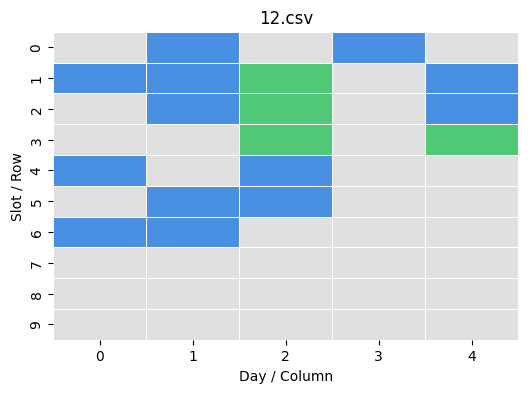

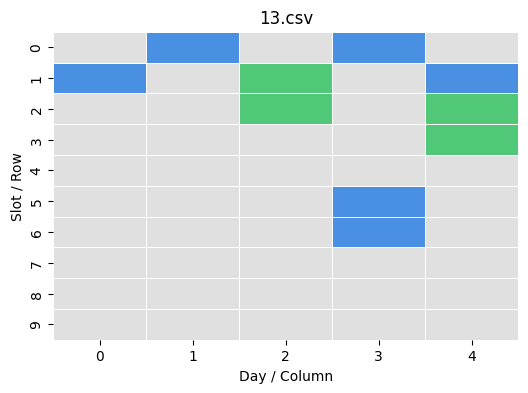

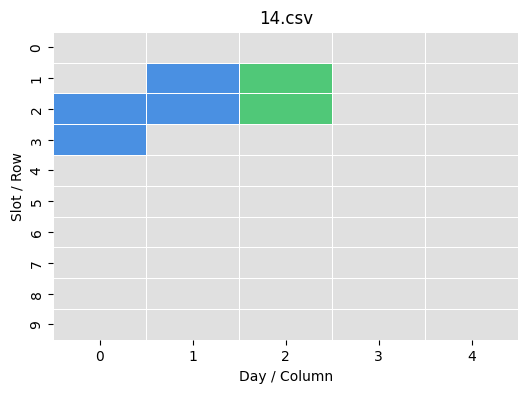

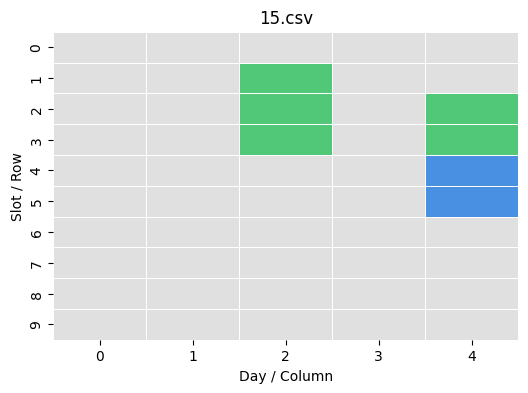

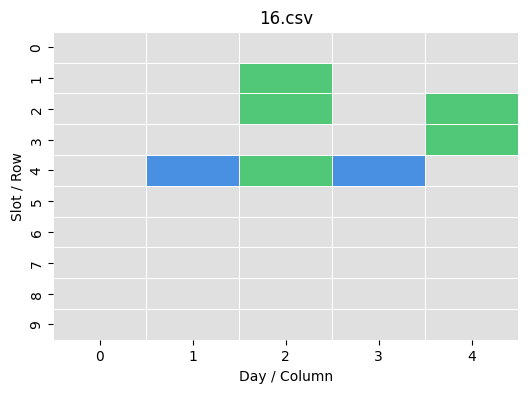

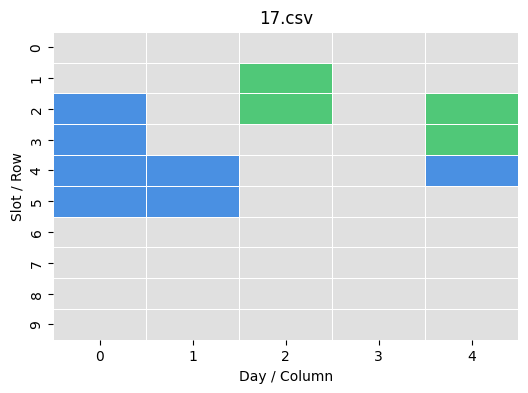

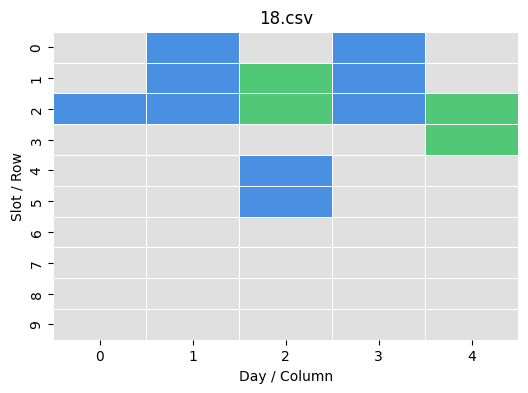

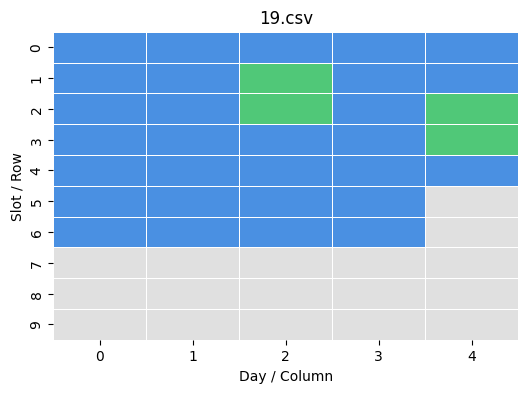

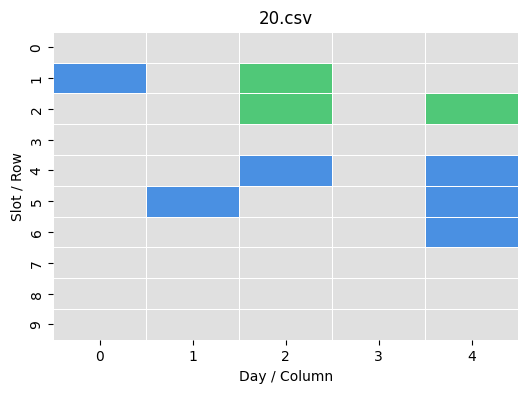

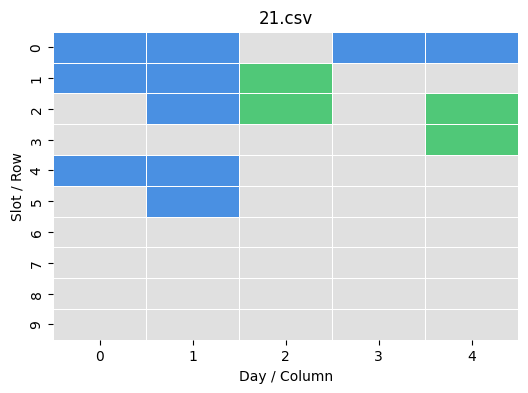

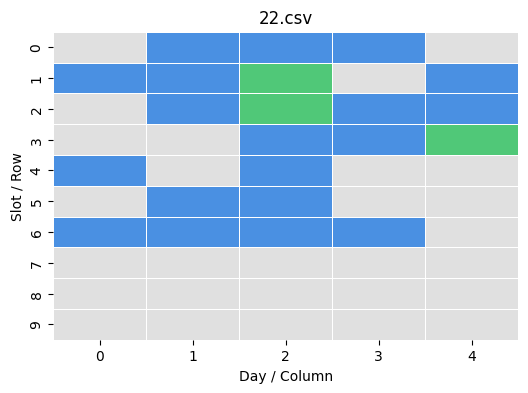

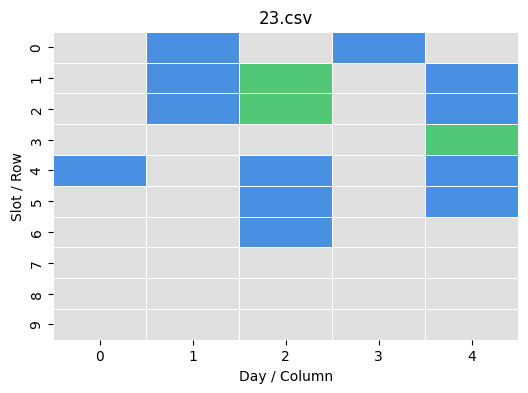

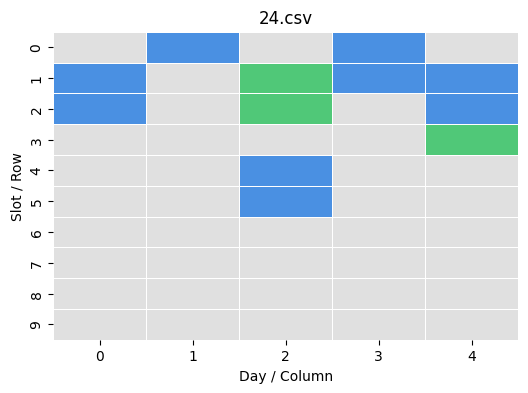

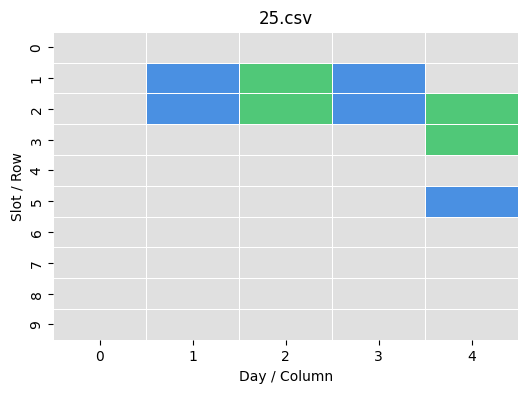

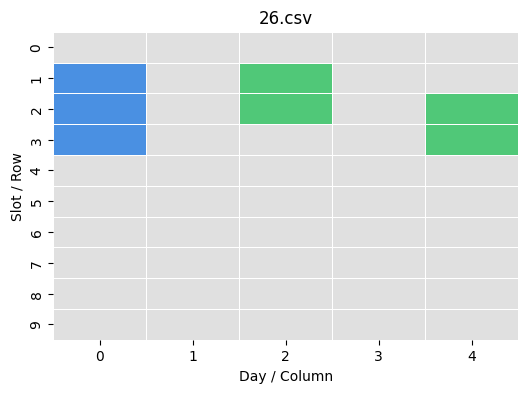

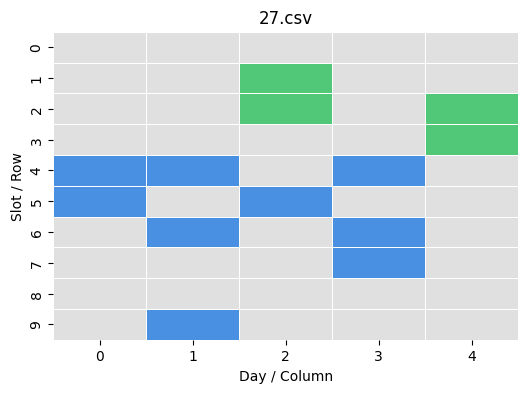

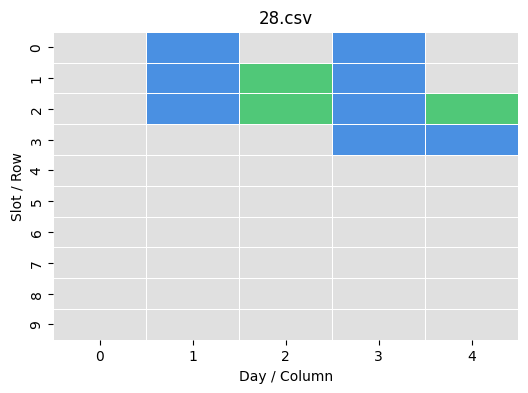

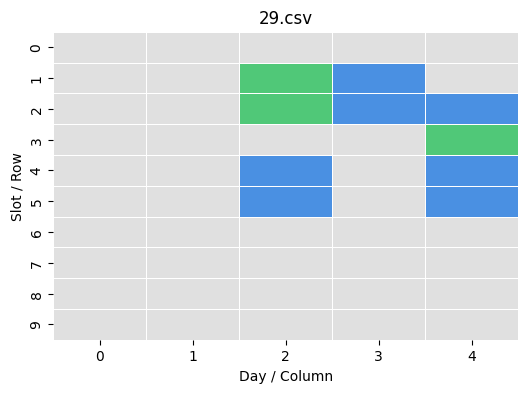

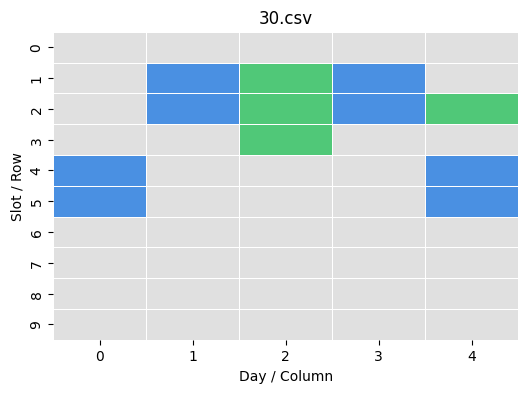

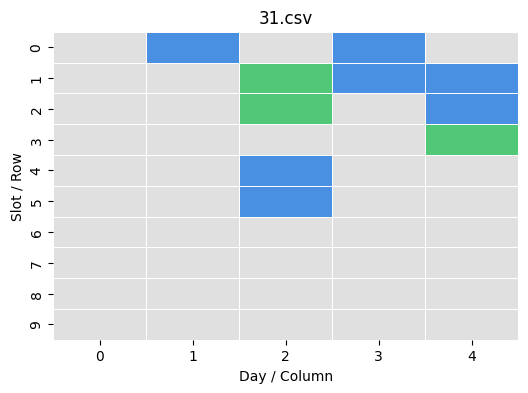

In [44]:
def show_schedule(df, titulo=""):
    plt.figure(figsize=(6, 4))
    cmap = sns.color_palette(["#e0e0e0", "#4A90E2", "#50C878"])
    sns.heatmap(df, cmap=cmap, cbar=False, linewidths=0.5, linecolor="white")
    plt.title(titulo)
    plt.xlabel("Day / Column")
    plt.ylabel("Slot / Row")
    plt.show()


for name in sorted(schedules_st.keys(), key=lambda x: int(os.path.splitext(x)[0])):
    show_schedule(schedules_st[name], titulo=name)

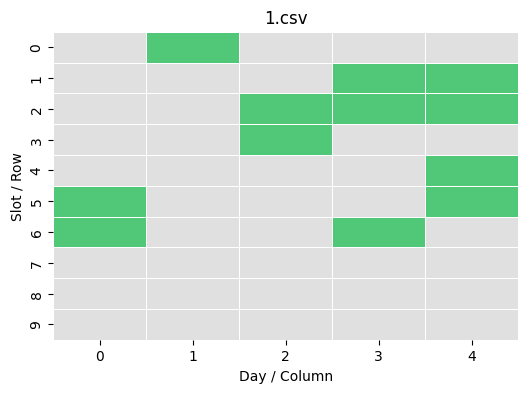

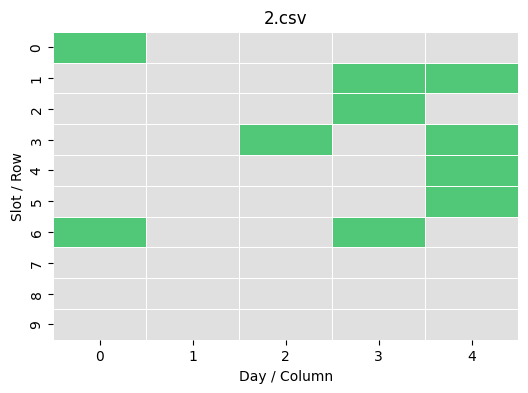

In [45]:
for name in sorted(schedules_as.keys(), key=lambda x: int(os.path.splitext(x)[0])):
    show_schedule(schedules_as[name], titulo=name)

---
### Accumulated Heatmap

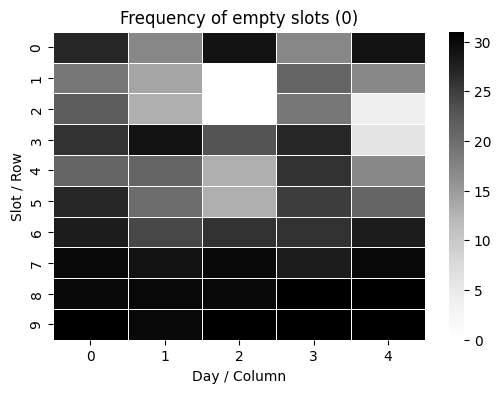

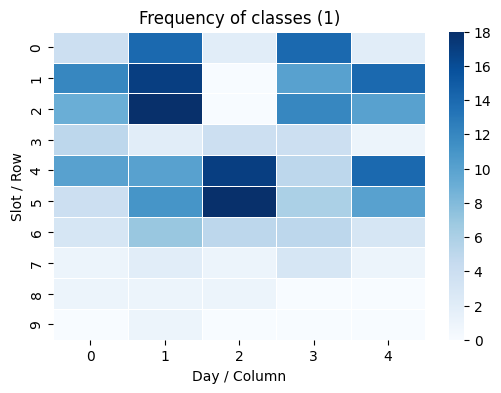

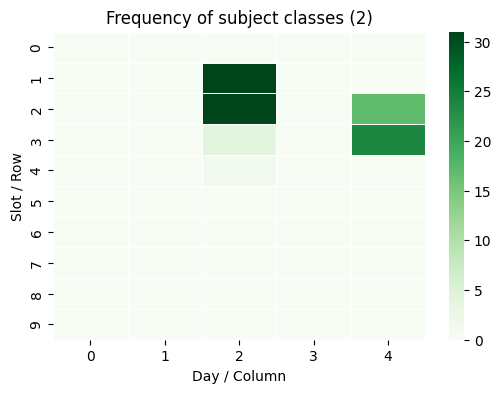

Slots with more emptys (0) → 31 times:
  • Row 8, Column 3
  • Row 8, Column 4
  • Row 9, Column 0
  • Row 9, Column 2
  • Row 9, Column 3
  • Row 9, Column 4

Slots with more classes (1) → 18 times:
  • Row 2, Column 1
  • Row 5, Column 2

Slots with more subject classes (2) → 31 times:
  • Row 1, Column 2
  • Row 2, Column 2


In [46]:
shape = list(schedules_st.values())[0].shape
count_0 = pd.DataFrame(np.zeros(shape, dtype=int))
count_1 = pd.DataFrame(np.zeros(shape, dtype=int))
count_2 = pd.DataFrame(np.zeros(shape, dtype=int))

for df in schedules_st.values():
    count_0 += (df == 0).astype(int)
    count_1 += (df == 1).astype(int)
    count_2 += (df == 2).astype(int)


def show_accumulated_heatmap(matrix, title, color):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap=color, cbar=True, linewidths=0.5, linecolor="white")
    plt.title(title)
    plt.xlabel("Day / Column")
    plt.ylabel("Slot / Row")
    plt.show()


show_accumulated_heatmap(count_0, "Frequency of empty slots (0)", "Greys")
show_accumulated_heatmap(count_1, "Frequency of classes (1)", "Blues")
show_accumulated_heatmap(count_2, "Frequency of subject classes (2)", "Greens")


def get_maximum(df):
    max_val = df.values.max()
    positions = np.argwhere(df.values == max_val)
    return max_val, positions


max_val_0, pos_0 = get_maximum(count_0)
max_val_1, pos_1 = get_maximum(count_1)
max_val_2, pos_2 = get_maximum(count_2)

print(f"Slots with more emptys (0) → {max_val_0} times:")
for row, col in pos_0:
    print(f"  • Row {row}, Column {col}")

print(f"\nSlots with more classes (1) → {max_val_1} times:")
for row, col in pos_1:
    print(f"  • Row {row}, Column {col}")

print(f"\nSlots with more subject classes (2) → {max_val_2} times:")
for row, col in pos_2:
    print(f"  • Row {row}, Column {col}")

---
### Accumulated Heatmap with Assistant and Forbidden Blocks

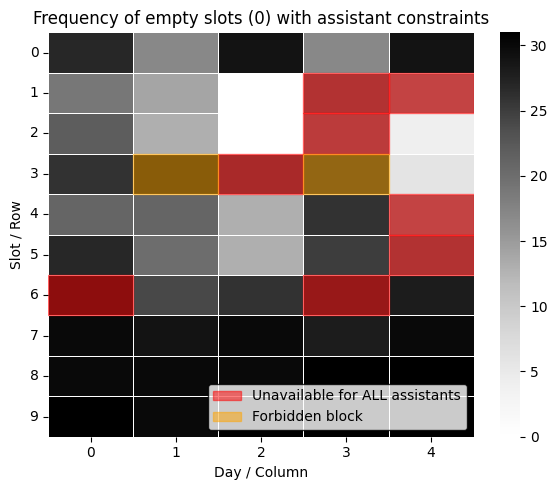

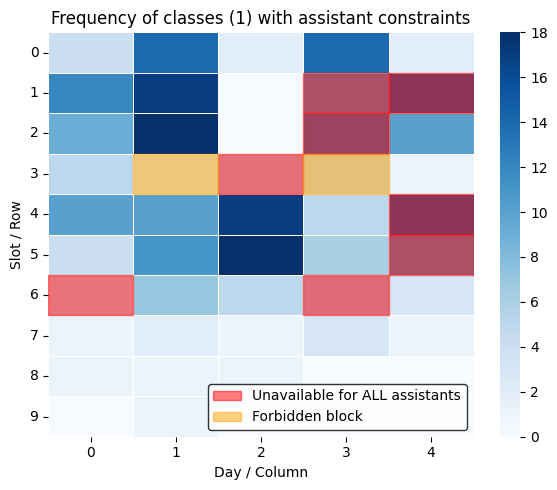

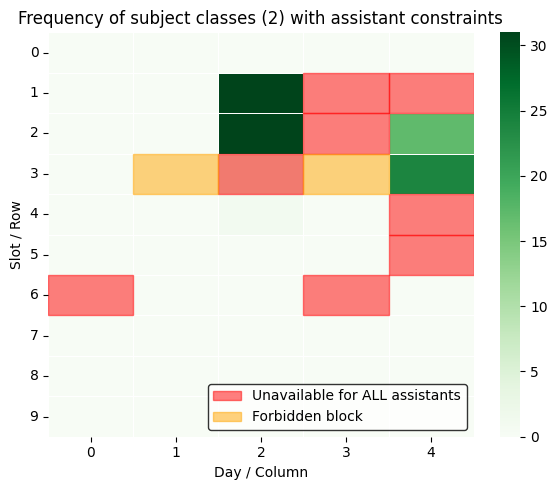

In [50]:
assistants_path = "../../data/INF-285/assistants/"
assistant_files = sorted([
    os.path.join(assistants_path, f)
    for f in os.listdir(assistants_path)
    if f.endswith(".csv")
])

assistants_list = [pd.read_csv(path, header=None).to_numpy() for path in assistant_files]

if len(assistants_list) == 0:
    raise ValueError("No assistant CSV files found.")

A = np.stack(assistants_list)

if len(set([a.shape for a in assistants_list])) != 1:
    raise ValueError("All assistant matrices must have the same shape.")

rows, cols = assistants_list[0].shape

all_assistants_unavailable = np.all(A == 1, axis=0).astype(int)

assistants_sum = np.sum(A == 1, axis=0) 
assistants_available_count = np.sum(A == 0, axis=0) 

shape = list(schedules_st.values())[0].shape

count_0 = np.zeros(shape, dtype=int)
count_1 = np.zeros(shape, dtype=int)
count_2 = np.zeros(shape, dtype=int)

for df in schedules_st.values():
    df_np = df.to_numpy()
    count_0 += (df_np == 0)
    count_1 += (df_np == 1)
    count_2 += (df_np == 2)

def show_accumulated_heatmap_with_as(count_matrix, all_as_unavailable, forbidden_matrix, title, color):
    plt.figure(figsize=(6, 5))

    ax = sns.heatmap(
        count_matrix,
        cmap=color,
        cbar=True,
        linewidths=0.5,
        linecolor="white"
    )

    ax.set_title(title)
    ax.set_xlabel("Day / Column")
    ax.set_ylabel("Slot / Row")

    num_rows = count_matrix.shape[0]
    ax.set_yticks(np.arange(num_rows) + 0.5)
    ax.set_yticklabels([str(i) for i in range(num_rows)], rotation=0)

    red_positions = np.argwhere(all_as_unavailable == 1)
    for i, j in red_positions:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color="red", alpha=0.5))

    orange_positions = np.argwhere(forbidden_matrix == 1)
    for i, j in orange_positions:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color="orange", alpha=0.5))

    red_patch = mpatches.Patch(color="red", alpha=0.5, label="Unavailable for ALL assistants")
    orange_patch = mpatches.Patch(color="orange", alpha=0.5, label="Forbidden block")

    ax.legend(
        handles=[red_patch, orange_patch],
        loc="lower right",
        frameon=True,
        facecolor="white",
        edgecolor="black",
    )

    plt.tight_layout()
    plt.show()

forbidden = pd.read_csv("../../data/INF-285/forbidden.csv", header=None).to_numpy()

show_accumulated_heatmap_with_as(
    count_0, all_assistants_unavailable, forbidden,
    "Frequency of empty slots (0) with assistant constraints",
    "Greys"
)

show_accumulated_heatmap_with_as(
    count_1, all_assistants_unavailable, forbidden,
    "Frequency of classes (1) with assistant constraints",
    "Blues"
)

show_accumulated_heatmap_with_as(
    count_2, all_assistants_unavailable, forbidden,
    "Frequency of subject classes (2) with assistant constraints",
    "Greens"
)
